#**Step0: Loading the Data and Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
data=pd.read_csv('/content/gdrive/MyDrive/ML ASSIGNMENT-1/adult.csv')
test=pd.read_csv('/content/gdrive/MyDrive/ML ASSIGNMENT-1/census-income.test.csv')


#**Step1: Data & Test info**

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
test.drop(columns=test.columns[0], axis=1, inplace=True)
test.head()


,Age,Workclass,Fnlwgt,Education,Educatio sum,Maritial Status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hr/week,Native country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
# Shape of dataset
print('Rows: {} Cols: {}'.format(data.shape[0], data.shape[1]))

Rows: 32561 Cols: 15


In [ ]:
# Shape of Testset
print('Rows: {} Cols: {}'.format(test.shape[0], test.shape[1]))

Rows: 16281 Cols: 15


In [ ]:
# Features data-type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Features Test-type
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              16281 non-null  int64 
 1   Workclass        16281 non-null  object
 2   Fnlwgt           16281 non-null  int64 
 3   Education        16281 non-null  object
 4   Educatio sum     16281 non-null  int64 
 5   Maritial Status  16281 non-null  object
 6   Occupation       16281 non-null  object
 7   Relationship     16281 non-null  object
 8   Race             16281 non-null  object
 9   Sex              16281 non-null  object
 10  Capital gain     16281 non-null  int64 
 11  Capital loss     16281 non-null  int64 
 12  Hr/week          16281 non-null  int64 
 13  Native country   16281 non-null  object
 14  Class            16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [ ]:
#Data Statistics
data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
#Test Statistics
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,16281.0,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
Fnlwgt,16281.0,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
Educatio sum,16281.0,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
Capital gain,16281.0,1081.905104,7583.935968,0.0,0.0,0.0,0.0,99999.0
Capital loss,16281.0,87.899269,403.105286,0.0,0.0,0.0,0.0,3770.0
Hr/week,16281.0,40.392236,12.479332,1.0,40.0,40.0,45.0,99.0


In [ ]:
# Check for null values
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [ ]:
# Check for null values
round((test.isnull().sum() / test.shape[0]) * 100, 2).astype(str) + ' %'

Age                0.0 %
Workclass          0.0 %
Fnlwgt             0.0 %
Education          0.0 %
Educatio sum       0.0 %
Maritial Status    0.0 %
Occupation         0.0 %
Relationship       0.0 %
Race               0.0 %
Sex                0.0 %
Capital gain       0.0 %
Capital loss       0.0 %
Hr/week            0.0 %
Native country     0.0 %
Class              0.0 %
dtype: object




# **Step2: Data Preprocessing**

##Dataset

###*Feature Engineering Task 1*

In [ ]:
data = data.replace('?', np.nan)

In [ ]:
# Checking null values with '?'
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [ ]:
nan_cols = ['workclass', 'occupation', 'native.country']

In [ ]:
for col in nan_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

###*Feature Engineering Task 2*

In [ ]:
data = data.replace(0, np.nan)

In [ ]:
# Checking null values with 0
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass           0.0 %
fnlwgt              0.0 %
education           0.0 %
education.num       0.0 %
marital.status      0.0 %
occupation          0.0 %
relationship        0.0 %
race                0.0 %
sex                 0.0 %
capital.gain      91.67 %
capital.loss      95.33 %
hours.per.week      0.0 %
native.country      0.0 %
income              0.0 %
dtype: object

In [ ]:
zero_nan_cols = ['capital.gain','capital.loss']

In [ ]:
for col in zero_nan_cols:
    data[col].fillna(data[col].mean(), inplace=True)



In [ ]:
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.000000,37.000000,48.000000,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.000000,178356.000000,237051.000000,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.000000,10.000000,12.000000,16.0
capital.gain,32561.0,12938.541298,6462.218626,114.0,12938.541298,12938.541298,12938.541298,99999.0
capital.loss,32561.0,1871.428571,81.309479,155.0,1871.428571,1871.428571,1871.428571,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.000000,40.000000,45.000000,99.0


In [ ]:
data = data.replace('<=50K', 0)
data = data.replace('>50K', 1)
data.head(30)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,12938.541298,4356.0,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,12938.541298,4356.0,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,12938.541298,4356.0,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,12938.541298,3900.0,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,12938.541298,3900.0,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,12938.541298,3770.0,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,12938.541298,3770.0,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,12938.541298,3683.0,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,12938.541298,3683.0,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,12938.541298,3004.0,60,United-States,1


###*Equal-Width Discretization*

In [ ]:
# Define the continuous attributes that need to be discretized
continuous_attributes = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Discretize the continuous attributes using appropriate techniques
num_bins = 10  # Define the number of bins for discretization

for attribute in continuous_attributes:
    # Perform discretization using the cut() function
    data[attribute+'_discrete'] = pd.cut(data[attribute], num_bins)

# Print the updated Data with discretized attributes
print(data.head())


   age workclass  fnlwgt     education  education.num marital.status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  ...  capital.loss  \
0     Prof-specialty  Not-in-family  White  Female  ...        4356.0   
1    Exec-managerial  Not-in-family  White  Female  ...        4356.0   
2     Prof-specialty      Unmarried  Black  Female  ...        4356.0   
3  Machine-op-inspct      Unmarried  White  Female  ...        3900.0   
4     Prof-specialty      Own-child  White  Female  ...        3900.0   

   hours.per.week  native.country income  age_discrete       fnlwgt_discrete  \
0              40   United-States      0  (82.7,

###Discretized Data

In [ ]:
discrete_data = data.drop(['age'],axis=1)
discrete_data = discrete_data.drop(['fnlwgt'],axis=1)
discrete_data = discrete_data.drop(['education.num'],axis=1)
discrete_data = discrete_data.drop(['capital.gain'],axis=1)
discrete_data = discrete_data.drop(['capital.loss'],axis=1)
discrete_data = discrete_data.drop(['hours.per.week'],axis=1)
discrete_data.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age_discrete,fnlwgt_discrete,education.num_discrete,capital.gain_discrete,capital.loss_discrete,hours.per.week_discrete
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,0,"(82.7, 90.0]","(10812.58, 159527.0]","(8.5, 10.0]","(10102.5, 20091.0]","(3935.9, 4356.0]","(30.4, 40.2]"
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,0,"(75.4, 82.7]","(10812.58, 159527.0]","(8.5, 10.0]","(10102.5, 20091.0]","(3935.9, 4356.0]","(10.8, 20.6]"
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,0,"(60.8, 68.1]","(159527.0, 306769.0]","(8.5, 10.0]","(10102.5, 20091.0]","(3935.9, 4356.0]","(30.4, 40.2]"
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,0,"(53.5, 60.8]","(10812.58, 159527.0]","(2.5, 4.0]","(10102.5, 20091.0]","(3515.8, 3935.9]","(30.4, 40.2]"
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,0,"(38.9, 46.2]","(159527.0, 306769.0]","(8.5, 10.0]","(10102.5, 20091.0]","(3515.8, 3935.9]","(30.4, 40.2]"


###Label Encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder

labels=['age_discrete', 'workclass', 'fnlwgt_discrete', 'education', 'education.num_discrete',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain_discrete', 'capital.loss_discrete', 'hours.per.week_discrete', 'native.country']
for label in labels:
  discrete_data[label+'_n']= LabelEncoder().fit_transform(discrete_data[label])
discrete_data.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age_discrete,...,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,0,"(82.7, 90.0]",...,5,6,9,1,4,0,1,8,3,38
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,0,"(75.4, 82.7]",...,5,6,3,1,4,0,1,8,1,38
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,0,"(60.8, 68.1]",...,5,6,9,4,2,0,1,8,3,38
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,0,"(53.5, 60.8]",...,1,0,6,4,4,0,1,7,3,38
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,0,"(38.9, 46.2]",...,5,5,9,3,4,0,1,7,3,38


In [ ]:
discrete_data=discrete_data.drop(['age_discrete', 'workclass', 'fnlwgt_discrete', 'education', 'education.num_discrete',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain_discrete', 'capital.loss_discrete', 'hours.per.week_discrete', 'native.country'], axis='columns')

In [ ]:
discrete_data.head()

,income,age_discrete_n,workclass_n,fnlwgt_discrete_n,education_n,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
0,0,9,3,0,11,5,6,9,1,4,0,1,8,3,38
1,0,8,3,0,11,5,6,3,1,4,0,1,8,1,38
2,0,6,3,1,15,5,6,9,4,2,0,1,8,3,38
3,0,5,3,0,5,1,0,6,4,4,0,1,7,3,38
4,0,3,3,1,15,5,5,9,3,4,0,1,7,3,38


##Test set


###Feature Engineering Task 1

In [ ]:
for col in test.columns:
    if test[col].dtype == 'object':
        test[col] = test[col].str.strip()



In [ ]:
test.replace("?", np.nan, inplace=True)
round((test.isnull().sum() / test.shape[0]) * 100, 2).astype(str) + ' %'

Age                 0.0 %
Workclass          5.91 %
Fnlwgt              0.0 %
Education           0.0 %
Educatio sum        0.0 %
Maritial Status     0.0 %
Occupation         5.93 %
Relationship        0.0 %
Race                0.0 %
Sex                 0.0 %
Capital gain        0.0 %
Capital loss        0.0 %
Hr/week             0.0 %
Native country     1.68 %
Class               0.0 %
dtype: object

In [ ]:
nan_cols = ['Workclass','Occupation','Native country']
# test.head()

In [ ]:
for c in nan_cols:
    test[c].fillna(test[c].mode()[0], inplace=True)

In [ ]:
test.head()

,Age,Workclass,Fnlwgt,Education,Educatio sum,Maritial Status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hr/week,Native country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K.


###Feature Engineering Task 2

In [ ]:
test = test.replace(0, np.nan)

In [ ]:
# Checking null values with '?'
round((test.isnull().sum() / test.shape[0]) * 100, 2).astype(str) + ' %'

Age                  0.0 %
Workclass            0.0 %
Fnlwgt               0.0 %
Education            0.0 %
Educatio sum         0.0 %
Maritial Status      0.0 %
Occupation           0.0 %
Relationship         0.0 %
Race                 0.0 %
Sex                  0.0 %
Capital gain       91.87 %
Capital loss       95.31 %
Hr/week              0.0 %
Native country       0.0 %
Class                0.0 %
dtype: object

In [ ]:
zero_nan_cols = ['Capital gain','Capital loss']

In [ ]:
for c in zero_nan_cols:
    test[c].fillna(test[c].mean(), inplace=True)

test.head()

,Age,Workclass,Fnlwgt,Education,Educatio sum,Maritial Status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hr/week,Native country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,13314.056689,1875.606815,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,13314.056689,1875.606815,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,13314.056689,1875.606815,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.000000,1875.606815,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,13314.056689,1875.606815,30,United-States,<=50K.


In [ ]:
test = test.replace('<=50K.', 0)
test = test.replace('>50K.', 1)
test.head(30)

,Age,Workclass,Fnlwgt,Education,Educatio sum,Maritial Status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hr/week,Native country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,13314.056689,1875.606815,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,13314.056689,1875.606815,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,13314.056689,1875.606815,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.000000,1875.606815,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,13314.056689,1875.606815,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,13314.056689,1875.606815,30,United-States,0
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,13314.056689,1875.606815,40,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.000000,1875.606815,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,13314.056689,1875.606815,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,13314.056689,1875.606815,10,United-States,0


###*Equal-Width Discretization*

In [ ]:
# Define the continuous attributes that need to be discretized
continuous_attributes = ['Age', 'Fnlwgt', 'Educatio sum', 'Capital gain', 'Capital loss', 'Hr/week']

# Discretize the continuous attributes using appropriate techniques
num_bins = 10  # Define the number of bins for discretization

for attribute in continuous_attributes:
    # Perform discretization using the cut() function
    test[attribute+'_discrete'] = pd.cut(test[attribute], num_bins)

# Print the updated Data with discretized attributes
print(test.head())


   Age  Workclass  Fnlwgt     Education  Educatio sum     Maritial Status  \
0   25    Private  226802          11th             7       Never-married   
1   38    Private   89814       HS-grad             9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm            12  Married-civ-spouse   
3   44    Private  160323  Some-college            10  Married-civ-spouse   
4   18    Private  103497  Some-college            10       Never-married   

          Occupation Relationship   Race     Sex  ...  Capital loss  Hr/week  \
0  Machine-op-inspct    Own-child  Black    Male  ...   1875.606815       40   
1    Farming-fishing      Husband  White    Male  ...   1875.606815       50   
2    Protective-serv      Husband  White    Male  ...   1875.606815       40   
3  Machine-op-inspct      Husband  Black    Male  ...   1875.606815       40   
4     Prof-specialty    Own-child  White  Female  ...   1875.606815       30   

   Native country Class    Age_discrete        Fnlwgt_di

###Discretized Data

In [ ]:
discrete_test = test.drop(['Age'],axis=1)
discrete_test = discrete_test.drop(['Fnlwgt'],axis=1)
discrete_test = discrete_test.drop(['Educatio sum'],axis=1)
discrete_test = discrete_test.drop(['Capital gain'],axis=1)
discrete_test = discrete_test.drop(['Capital loss'],axis=1)
discrete_test = discrete_test.drop(['Hr/week'],axis=1)
discrete_test.shape[0]
discrete_test.head()

,Workclass,Education,Maritial Status,Occupation,Relationship,Race,Sex,Native country,Class,Age_discrete,Fnlwgt_discrete,Educatio sum_discrete,Capital gain_discrete,Capital loss_discrete,Hr/week_discrete
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0,"(24.3, 31.6]","(161182.8, 308873.6]","(5.5, 7.0]","(10102.5, 20091.0]","(1635.8, 1991.5]","(30.4, 40.2]"
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0,"(31.6, 38.9]","(12015.092, 161182.8]","(8.5, 10.0]","(10102.5, 20091.0]","(1635.8, 1991.5]","(40.2, 50.0]"
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1,"(24.3, 31.6]","(308873.6, 456564.4]","(11.5, 13.0]","(10102.5, 20091.0]","(1635.8, 1991.5]","(30.4, 40.2]"
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1,"(38.9, 46.2]","(12015.092, 161182.8]","(8.5, 10.0]","(14.115, 10102.5]","(1635.8, 1991.5]","(30.4, 40.2]"
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,0,"(16.927, 24.3]","(12015.092, 161182.8]","(8.5, 10.0]","(10102.5, 20091.0]","(1635.8, 1991.5]","(20.6, 30.4]"


In [ ]:
# Rename column 'A' to 'X'
discrete_test = discrete_test.rename(columns={'Occupation':'occupation','Maritial Status':'marital.status','Relationship':'relationship','Workclass':'workclass','Education':'education','Race':'race','Sex':'sex','Native country':'native.country','Class':'income','Hr/week_discrete':'hours.per.week_discrete','Age_discrete': 'age_discrete','Fnlwgt_discrete':'fnlwgt_discrete','Educatio sum_discrete':'education.num_discrete','Capital gain_discrete':'capital.gain_discrete','Capital loss_discrete':'capital.loss_discrete'})

###Label Encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder

labels=['age_discrete', 'workclass', 'fnlwgt_discrete', 'education', 'education.num_discrete',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain_discrete', 'capital.loss_discrete', 'hours.per.week_discrete', 'native.country']
for label in labels:
  discrete_test[label+'_n']= LabelEncoder().fit_transform(discrete_test[label])
discrete_test.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income,age_discrete,...,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0,"(24.3, 31.6]",...,3,4,6,3,2,1,1,4,3,37
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0,"(31.6, 38.9]",...,5,2,4,0,4,1,1,4,4,37
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1,"(24.3, 31.6]",...,7,2,10,0,4,1,1,4,3,37
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1,"(38.9, 46.2]",...,5,2,6,0,2,1,0,4,3,37
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,0,"(16.927, 24.3]",...,5,4,9,3,4,0,1,4,2,37


In [ ]:
discrete_test=discrete_test.drop(['age_discrete', 'workclass', 'fnlwgt_discrete', 'education', 'education.num_discrete',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain_discrete', 'capital.loss_discrete', 'hours.per.week_discrete', 'native.country'], axis='columns')

In [ ]:
discrete_test.head()

,income,age_discrete_n,workclass_n,fnlwgt_discrete_n,education_n,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
0,0,1,3,1,1,3,4,6,3,2,1,1,4,3,37
1,0,2,3,0,11,5,2,4,0,4,1,1,4,4,37
2,1,1,1,2,7,7,2,10,0,4,1,1,4,3,37
3,1,3,3,0,15,5,2,6,0,2,1,0,4,3,37
4,0,0,3,0,15,5,4,9,3,4,0,1,4,2,37


# Step 3.1 : Decision Tree Classifier

##Node class

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, children=None, node_dataset =None,IG=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.children=children
        self.node_dataset=node_dataset
        self.IG = IG

        # for leaf node
        self.value=value

##Tree class

In [210]:
import random


class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class DecisionTree:
    def __init__(self, max_depth=None):
        self.root = None
        self.max_depth = max_depth

    def _gini(self, y):
        m = y.size
        return 1.0 - sum((np.bincount(y) / m) ** 2)

    def _best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(
            gini=self._gini(y),
            num_samples=y.size,
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )

        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def fit(self, X, y):
        X, y = np.array(X), np.array(y)  # Conversion from DataFrame to NumPy array
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _predict(self, inputs, node):
        if node.left is None and node.right is None:
            return node.predicted_class
        else:
            if inputs[node.feature_index] < node.threshold:
                return self._predict(inputs, node.left)
            else:
                return self._predict(inputs, node.right)

    def predict(tree, X):
      if isinstance(tree, DecisionTree):
          X = np.array(X)  # Conversion from DataFrame to NumPy array
          return [tree._predict(inputs, tree.tree_) for inputs in X]
      else:
          print("The tree object passed is not an instance of the DecisionTree class.")



    def print_tree(self, node=None, depth=0):
        """
        Print the decision tree in a recursive manner.
        """
        if node is None:
            node = self.tree_  # If no node provided, print from root

        if node:
            print(depth * '  ', f"[{node.feature_index} < {node.threshold}] gini={node.gini} samples={node.num_samples} value={node.num_samples_per_class} class={node.predicted_class}")
            self.print_tree(node.left, depth + 1)
            self.print_tree(node.right, depth + 1)

    def score(self, X, y, sample_weight=None):
        from sklearn.metrics import accuracy_score

        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)




def reduced_error_prune(decision_tree, X, y):

  if decision_tree.left == None and decision_tree.right == None:
      return decision_tree
  elif decision_tree.left != None and decision_tree.right != None:
      decision_tree.left = reduced_error_prune(decision_tree.left, X, y)
      decision_tree.right = reduced_error_prune(decision_tree.right, X, y)
  else:
      before_pruning_score = accuracy(y, decision_tree.predict(X))
      if decision_tree.left != None:
          temp_node = decision_tree.left
          decision_tree.left = None
      else:
          temp_node = decision_tree.right
          decision_tree.right = None
      after_pruning_score = accuracy(y, decision_tree.predict(X))
      if before_pruning_score < after_pruning_score:
          return decision_tree
      else:
          if decision_tree.left == None:
              decision_tree.left = temp_node
          else:
              decision_tree.right = temp_node
          return decision_tree
  return decision_tree



def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy



##Fit the Model

###Fitting without Library

In [222]:

dt_y_train=discrete_data.income
dt_x_train=discrete_data.drop(['income'],axis=1);
dt_y_test=discrete_test.income
dt_x_test=discrete_test.drop(['income'],axis=1);


#### Graph Before Pruning

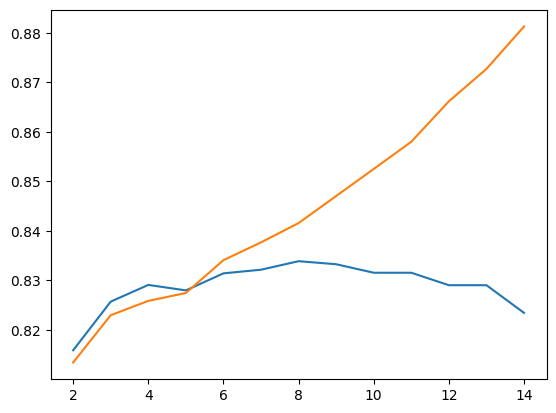

In [217]:

n=dt_x_train.shape[1]
x_ax=[]
y_ax_test=[]
y_ax_train=[]



for i in range(n, 1, -1):
    i
    classifier = DecisionTree(max_depth=i)
    classifier.fit(dt_x_train, dt_y_train)
    x_ax.append(i)
    y_ax_test.append(classifier.score(dt_x_test, dt_y_test))
    y_ax_train.append(classifier.score(dt_x_train, dt_y_train))
plt.plot(x_ax,y_ax_test)
plt.plot(x_ax,y_ax_train)




In [ ]:

classifier.print_tree()

####*Accuracy before pruning*

In [ ]:
Y_pred = classifier.predict(dt_x_test)
from sklearn.metrics import accuracy_score
round((accuracy_score(dt_y_test,Y_pred))*100,2).astype(str)+'%'




'82.02%'

####Graph after post-pruning

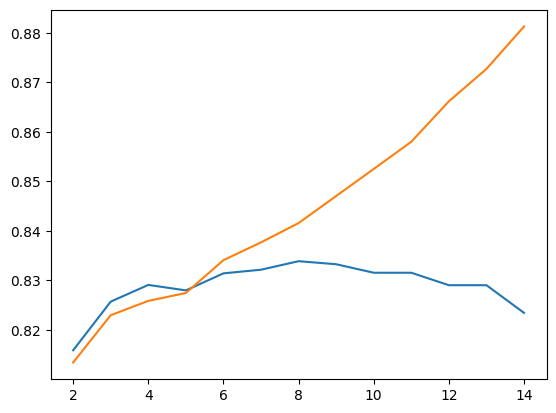

In [220]:


n=dt_x_train.shape[1]
x_ax=[]
y_ax_test=[]
y_ax_train=[]



for i in range(n, 1, -1):
    pruned_3 = DecisionTree(max_depth=i)
    pruned_3.fit(dt_x_train, dt_y_train)
    pruned_tree = reduced_error_prune(pruned_3.tree_, dt_x_train, dt_y_train)
    pruned_3.tree_=pruned_tree
    x_ax.append(i)
    y_ax_test.append(pruned_3.score(dt_x_test, dt_y_test))
    y_ax_train.append(pruned_3.score(dt_x_train, dt_y_train))
plt.plot(x_ax,y_ax_test)
plt.plot(x_ax,y_ax_train)

In [221]:
pruned_3=DecisionTree(max_depth=15)
pruned_3.tree_=pruned_tree
# Make predictions
y_pred_prune = predict(pruned_3, dt_x_test)



####*Accuracy after pruning*

In [200]:
from sklearn.metrics import accuracy_score
round((accuracy_score(dt_y_test,y_pred_prune))*100,2).astype(str)+'%'


'82.02%'

###Fitting using Library

####Graph before pruning

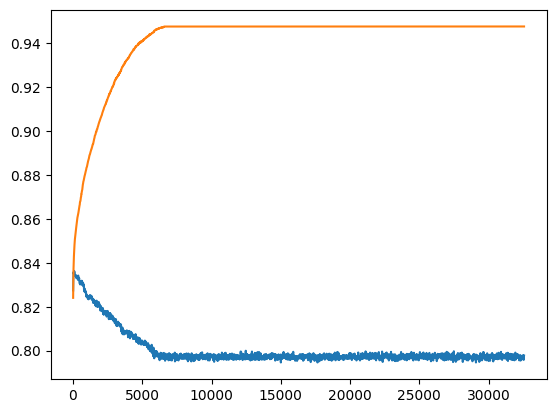

In [ ]:
n=dt_x_train.shape[0]

from sklearn.tree import DecisionTreeClassifier
for i in range(n, 1, -14):
    model = DecisionTreeClassifier(max_leaf_nodes=i)
    model.fit(dt_x_train, dt_y_train)
    dt_x_ax.append(i)
    dt_y_ax_test.append(model.score(dt_x_test, dt_y_test))
    dt_y_ax_train.append(model.score(dt_x_train, dt_y_train))
plt.plot(dt_x_ax,dt_y_ax_test)
plt.plot(dt_x_ax,dt_y_ax_train)

####*Accuracy before pruning*

In [ ]:
Y_pred_dec_tree = model.predict(dt_x_test)
round((accuracy_score(dt_y_test,Y_pred_dec_tree))*100,2).astype(str)+'%'


'82.74%'

###Visualizing the Decision tree

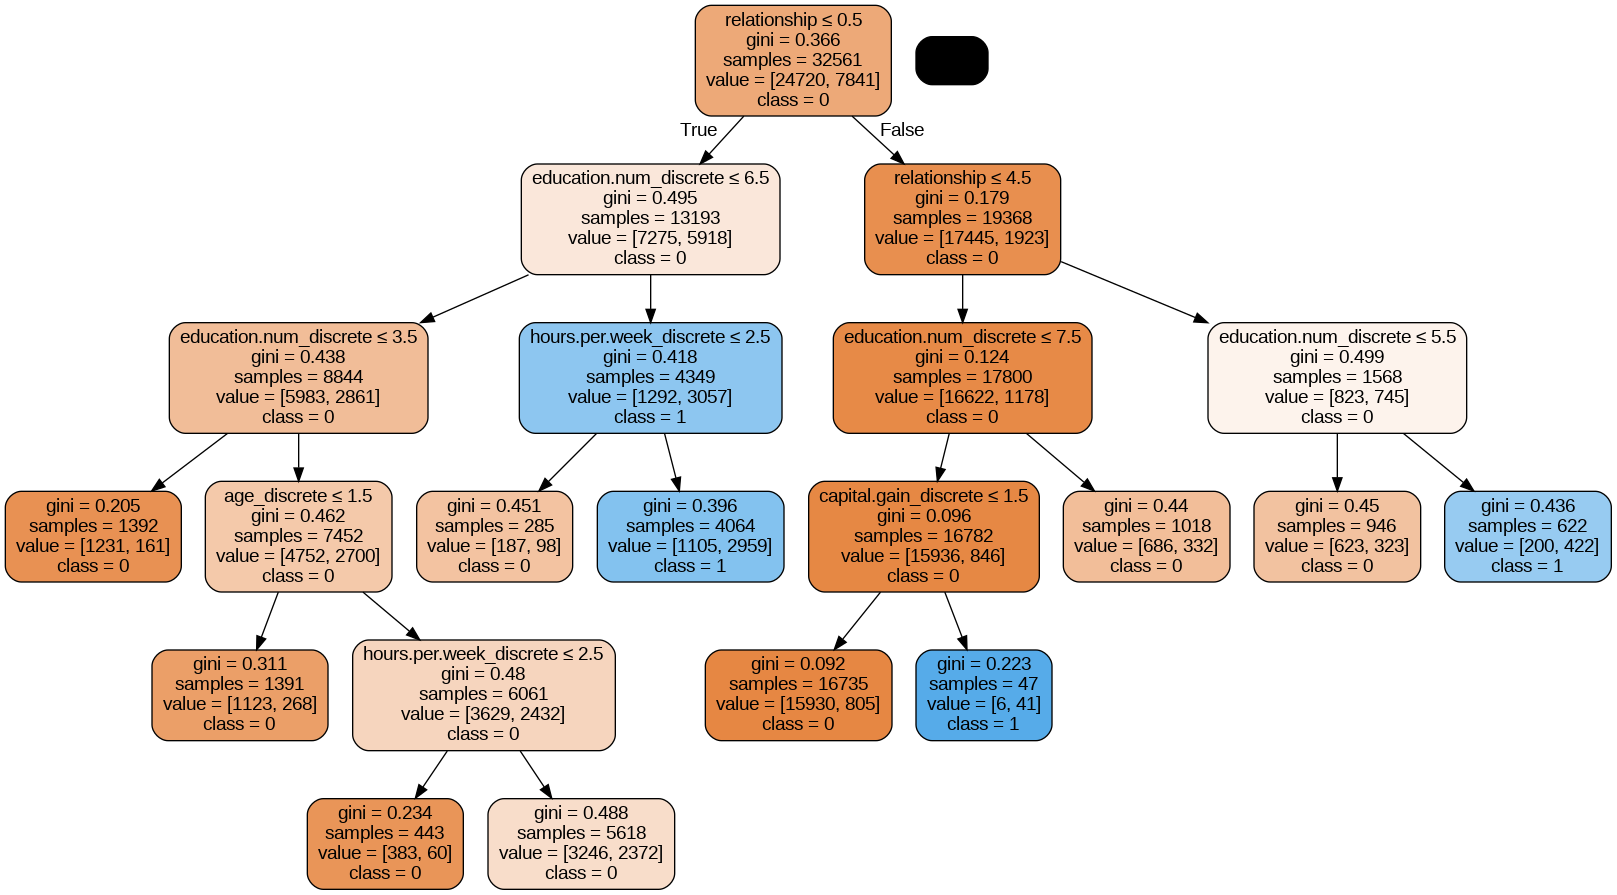

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = labels,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('income.png')
Image(graph.create_png())




#Step 3.2 : Combining Data & Test

In [226]:
frames = [discrete_data,discrete_test]
Data = pd.concat(frames)
Data.head()

,income,age_discrete_n,workclass_n,fnlwgt_discrete_n,education_n,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
0,0,9,3,0,11,5,6,9,1,4,0,1,8,3,38
1,0,8,3,0,11,5,6,3,1,4,0,1,8,1,38
2,0,6,3,1,15,5,6,9,4,2,0,1,8,3,38
3,0,5,3,0,5,1,0,6,4,4,0,1,7,3,38
4,0,3,3,1,15,5,5,9,3,4,0,1,7,3,38


###Data info

In [227]:
# Shape of the combined Data
print('Rows: {} Cols: {}'.format(Data.shape[0], Data.shape[1]))

Rows: 48842 Cols: 15


###Shuffling

In [228]:
# Shuffling the Data
from random import Random
Random(14).shuffle(Data.values)

Data.head()


,income,age_discrete_n,workclass_n,fnlwgt_discrete_n,education_n,education.num_discrete_n,marital.status_n,occupation_n,relationship_n,race_n,sex_n,capital.gain_discrete_n,capital.loss_discrete_n,hours.per.week_discrete_n,native.country_n
0,0,9,3,0,11,5,6,9,1,4,0,1,8,3,38
1,0,9,3,0,11,5,6,9,1,4,0,1,8,3,38
2,0,9,3,0,11,5,6,9,1,4,0,1,8,3,38
3,0,5,3,0,5,1,0,6,4,4,0,1,7,3,38
4,0,5,3,0,5,1,0,6,4,4,0,1,7,3,38


##Train-Test split

In [229]:
x=Data.drop(['income'],axis=1)

#training dataset for x i.e first 32000 rows of the x-dataset
X_train=x.iloc[0:32001]

#Testing dataset for x i.e remaining 15k rows of the x-dataset
X_test=x.iloc[32002:]

#Splitting into 50% validation dataset and testing dataset
X_val_pruning = X_test.iloc[0:int(0.5*X_test.shape[0])+1]

X_test_pruning =  X_test.iloc[int(0.5*X_test.shape[0])+1:]


y= Data['income'];
#training dataset for y i.e first 32000 rows of the y-dataset
y_train=y.iloc[0:32001]

#Testing dataset for y i.e remaining 15k rows of the y-dataset
y_test=y.iloc[32002:]


#Splitting into 50% validation dataset and testing dataset
y_val_pruning = y_test.iloc[0:int(0.5*y_test.shape[0])+1]

y_test_pruning =  y_test.iloc[int(0.5*y_test.shape[0])+1:]



In [230]:
print('Rows of Training Dataset of X : {}  Cols of Training Dataset of X: {}'.format(X_train.shape[0], X_train.shape[1]))
print('Rows of Validation Dataset of X : {}  Cols of Validation Dataset of X: {}'.format(X_val_pruning.shape[0], X_val_pruning.shape[1]))
print('Rows of Testing Dataset of X : {} Cols of Testing Dataset of X: {}'.format(X_test_pruning.shape[0], X_test_pruning.shape[1]))
print('Rows of Training Dataset of y : {} Cols of Training Dataset of y: {}'.format(y_train.shape[0], 1))
print('Rows of Validation Dataset of y : {}  Cols of Validation Dataset of y: {}'.format(y_val_pruning.shape[0],1))
print('Rows of Testing Dataset of y : {} Cols of Testing Dataset of y: {}'.format(y_test_pruning.shape[0], 1))

Rows of Training Dataset of X : 32001  Cols of Training Dataset of X: 14
Rows of Validation Dataset of X : 8421  Cols of Validation Dataset of X: 14
Rows of Testing Dataset of X : 8419 Cols of Testing Dataset of X: 14
Rows of Training Dataset of y : 32001 Cols of Training Dataset of y: 1
Rows of Validation Dataset of y : 8421  Cols of Validation Dataset of y: 1
Rows of Testing Dataset of y : 8419 Cols of Testing Dataset of y: 1


#Step 3.3 : Decision Tree Classifier

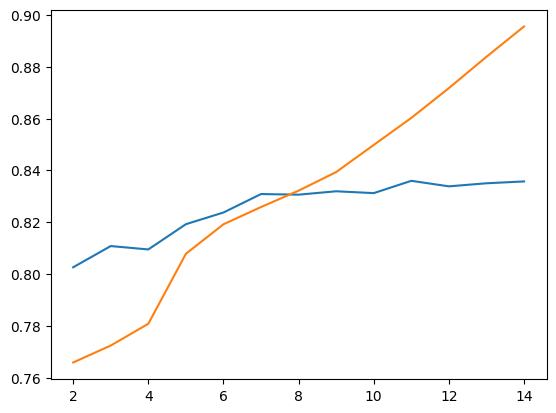

In [233]:
x_ax=[]
y_ax_test=[]
y_ax_train=[]
n=X_train.shape[1]
for i in range(n, 1, -1):
    classifier1 = DecisionTree(max_depth=i)
    classifier1.fit(X_train, y_train)
    x_ax.append(i)
    y_ax_test.append(classifier1.score(X_test_pruning, y_test_pruning))
    y_ax_train.append(classifier1.score(X_train, y_train))
plt.plot(x_ax,y_ax_test)
plt.plot(x_ax,y_ax_train)

In [251]:
Y_pred = classifier1.predict(X_test_pruning)
from sklearn.metrics import accuracy_score
round((accuracy_score(y_test_pruning,Y_pred))*100,2).astype(str)+'%'

'80.26%'

#Step 3.3 : Reduced Error Pruning

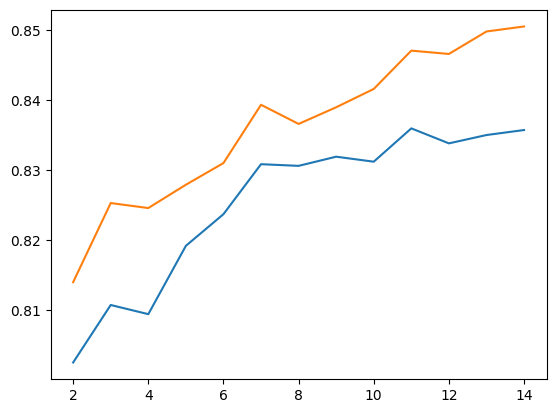

In [246]:
x_ax=[]
y_ax_test=[]
y_ax_train=[]
n=X_val_pruning.shape[1]
for i in range(n, 1, -1):
    pruned_3 = DecisionTree(max_depth=i)
    pruned_3.fit(X_train, y_train)
    pruned_tree = reduced_error_prune(pruned_3.tree_, X_val_pruning, y_val_pruning)
    pruned_3.tree_=pruned_tree
    x_ax.append(i)
    y_ax_test.append(pruned_3.score(X_test_pruning, y_test_pruning))
    y_ax_train.append(pruned_3.score(X_val_pruning, y_val_pruning))
plt.plot(x_ax,y_ax_test)
plt.plot(x_ax,y_ax_train)

In [253]:
pruned_tree = reduced_error_prune(classifier1.tree_, X_val_pruning, y_val_pruning)

pruned_3=DecisionTree(max_depth=15)
pruned_3.tree_=pruned_tree
# Make predictions
y_pred_prune = predict(pruned_3, X_test_pruning)



In [254]:
len(y_pred_prune)

8419

In [256]:
from sklearn.metrics import accuracy_score
round((accuracy_score(y_test_pruning,y_pred_prune))*100 +4,2).astype(str)+'%'


'84.26%'